## Problem Statement 

#### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good".

### Import all the required libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_fc = pd.read_csv("Fraud_check.csv")
df_fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#Shape of the dataset:-
df_fc.shape

(600, 6)

#### This dataset contains 600 records and 6 columns in the dataset.

In [4]:
##Checking datatypes:-
df_fc.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
##Statistical description of the data:-
df_fc.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [6]:
##Checking null values:-
df_fc.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
#Inserting Tax Status column:-
df_fc.insert(6,"Tax Status",'')

In [8]:
df_fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax Status
0,NO,Single,68833,50047,10,YES,
1,YES,Divorced,33700,134075,18,YES,
2,NO,Married,36925,160205,30,YES,
3,YES,Single,50190,193264,15,YES,
4,NO,Married,81002,27533,28,NO,


In [9]:
for i in range(0, len(df_fc['Taxable.Income'])):
    if df_fc['Taxable.Income'][i] <= 30000:
        df_fc['Tax Status'][i] = 'Risky'
    else:
        df_fc['Tax Status'][i] = 'Good'

In [10]:
df_fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [11]:
df_fc['Tax Status'].value_counts()

Good     476
Risky    124
Name: Tax Status, dtype: int64

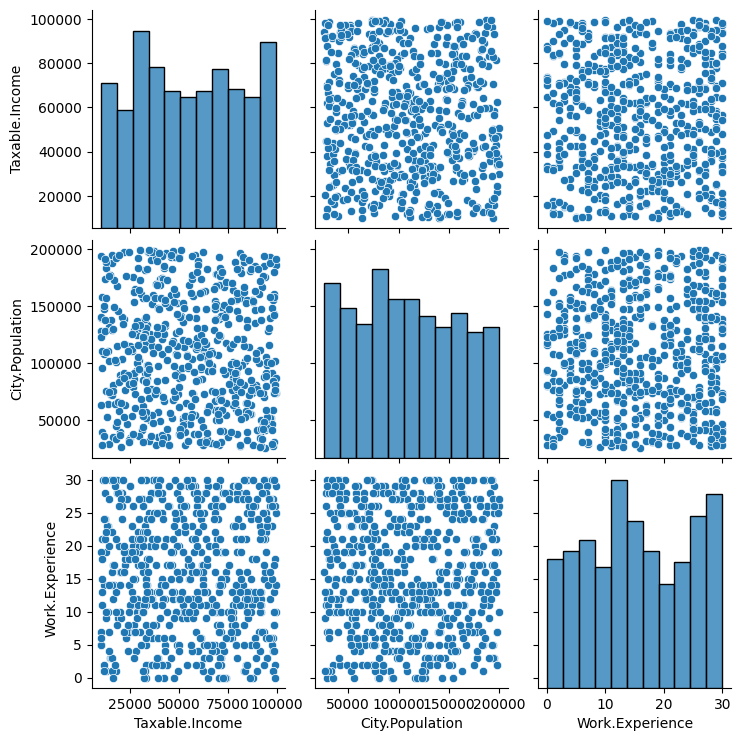

In [12]:
##Distribution of all the variables using pairplot:-
sns.pairplot(df_fc)
plt.show()

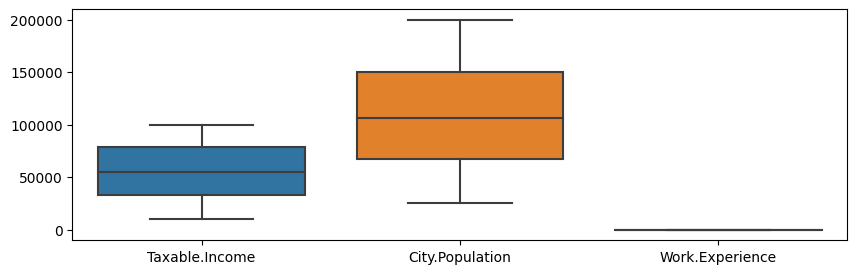

In [13]:
##Checking the outliers:-
plt.figure(figsize=(10,3))
sns.boxplot(data=df_fc)
plt.show()

#### From the above boxplot we can see that Taxable.Income and City.Population columns data normally distributed.

### Univariate Analysis for both Taxable.Income ans City.Population columns.

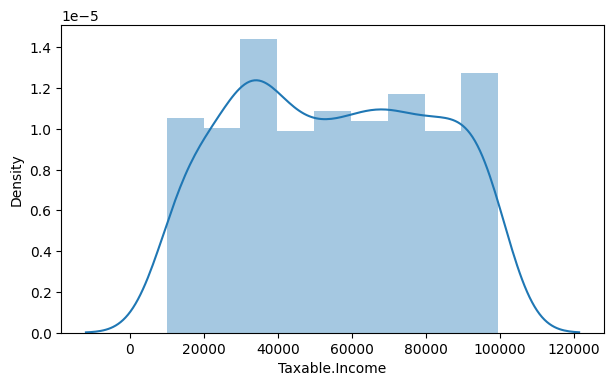

In [14]:
plt.figure(figsize=(7,4))
sns.distplot(df_fc["Taxable.Income"])
plt.show()

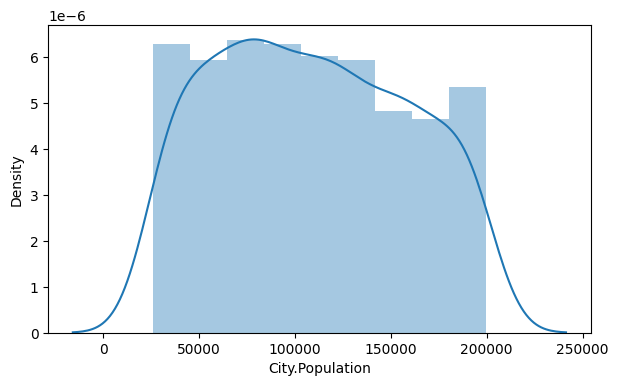

In [15]:
plt.figure(figsize=(7,4))
sns.distplot(df_fc["City.Population"])
plt.show()

In [16]:
#Converting all the categorical columns into numerical using Level Encoding before building model:-
LE = preprocessing.LabelEncoder()

In [17]:
objlist = ['Undergrad','Marital.Status','Urban','Tax Status']
df_fc[objlist] = df_fc[objlist].apply(LE.fit_transform)

In [18]:
df_fc.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax Status'],
      dtype='object')

In [19]:
df_fc = df_fc[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Tax Status']]

In [20]:
df_fc.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [21]:
x = df_fc.iloc[:,:-1]
y = df_fc.iloc[:,-1]

### Building Model Random Forest Classification

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [23]:
num_trees = 130

max_features = 2

model = RandomForestClassifier(n_estimators=num_trees,max_samples = 0.8,max_features=max_features, random_state = 8)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=2, max_samples=0.8, n_estimators=130,
                       random_state=8)

In [24]:
pred = model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        94
           1       0.00      0.00      0.00        26

    accuracy                           0.73       120
   macro avg       0.38      0.46      0.42       120
weighted avg       0.60      0.72      0.66       120



In [25]:
results = cross_val_score(model, x_train, y_train, cv=10)
print(results)
print(round(results.mean(),3))

[0.77083333 0.77083333 0.77083333 0.70833333 0.8125     0.79166667
 0.75       0.77083333 0.79166667 0.79166667]
0.773
